In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


In [ ]:
cds_data_path = '/content/drive/MyDrive/Colab_Notebooks/CDS_data/'
nmms_data_path = '/content/drive/MyDrive/Colab Notebooks/NMMS_data/'


In [ ]:
# Load the files from the respective paths
nmme_data = xr.open_dataset('/content/drive/MyDrive/Colab_Notebooks/NMME_data/prec.CanESM5.1991.mon_Dec.nc')
nmme_slice = nmme_data["prec"]
nmme_data = nmme_slice.to_dataframe().reset_index()

# To view the dataset
print(nmme_data)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/Colab_Notebooks/NMME_data/prec.CanESM5.1991.mon_Dec.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Load the files from the respective paths
cds_data = xr.open_dataset('/content/drive/MyDrive/Colab_Notebooks/CDS_data/prec.ECMWF.2024.mon_Dec.nc')
cds_slice = cds_data['tprate']
cds_data = cds_slice.to_dataframe().reset_index()

# To view the dataset
print(cds_data)


          forecastMonth forecast_reference_time  number  latitude  longitude  \
0                     1              2024-12-01       0      89.5        0.5   
1                     1              2024-12-01       0      89.5        1.5   
2                     1              2024-12-01       0      89.5        2.5   
3                     1              2024-12-01       0      89.5        3.5   
4                     1              2024-12-01       0      89.5        4.5   
...                 ...                     ...     ...       ...        ...   
19828795              6              2024-12-01      50     -89.5      355.5   
19828796              6              2024-12-01      50     -89.5      356.5   
19828797              6              2024-12-01      50     -89.5      357.5   
19828798              6              2024-12-01      50     -89.5      358.5   
19828799              6              2024-12-01      50     -89.5      359.5   

                tprate  
0         6.65

In [ ]:
# Step 1: Rename spatial coordinates in CDS to match NMME
cds_data = cds_data.rename({'latitude': 'Y', 'longitude': 'X', 'number': 'M',
                            'forecastMonth': 'L', 'forecast_reference_time': 'S'}, axis=1)

# Step 2: Optionally rename variables for consistency
cds_data = cds_data.rename({'tprate': 'prec'}, axis=1)

# Step 3: Convert units in CDS (m/sec to mm/day)
cds_data['prec'] = cds_data['prec'] * 86400000

# Step 4: Align CDS spatial coordinates with NMME grid
# Extract unique spatial coordinates from NMME
unique_lat = np.sort(nmme_data['Y'].unique())
unique_lon = np.sort(nmme_data['X'].unique())

# Map CDS coordinates to the nearest NMME grid point
cds_data['Y'] = cds_data['Y'].apply(lambda y: unique_lat[np.abs(unique_lat - y).argmin()])
cds_data['X'] = cds_data['X'].apply(lambda x: unique_lon[np.abs(unique_lon - x).argmin()])

# Step 5: Verify alignment
print("Aligned CDS spatial extents:")
print(f"Latitudes: {cds_data['Y'].min()} to {cds_data['Y'].max()}")
print(f"Longitudes: {cds_data['X'].min()} to {cds_data['X'].max()}")

print("\nUnchanged NMME spatial extents:")
print(f"Latitudes: {nmme_data['Y'].min()} to {nmme_data['Y'].max()}")
print(f"Longitudes: {nmme_data['X'].min()} to {nmme_data['X'].max()}")

# Step 6: Save the aligned CDS data
#cds_data.to_csv('/mnt/data/cds_data_aligned.csv', index=False)



Aligned CDS spatial extents:
Latitudes: -90.0 to 89.0
Longitudes: 0.0 to 359.0

Unchanged NMME spatial extents:
Latitudes: -90.0 to 90.0
Longitudes: 0.0 to 359.0


Key Differences Between NMME and CDS
Dimensions:

NMME data has dimensions: (Y: 181, L: 12, X: 360, M: 20, S: 1)
CDS data has dimensions: (number: 51, forecast_reference_time: 1, forecastMonth: 6, latitude: 180, longitude: 360)
The key differences here are the naming of dimensions (Y vs latitude, X vs longitude), and the presence of multiple dimensions in the NMME data (L, M, and S).

Coordinates:

Latitude and Longitude: The latitude and longitude coordinates are similar in both datasets, though the ranges might differ slightly.
NMME: Y (latitude), X (longitude)
CDS: latitude, longitude
Time and Variables:

The time dimension (S) in NMME corresponds to forecast_reference_time in CDS, and the variable names are different (prec in NMME vs tprate in CDS).
Plan to Align the Data
Coordinate Alignment:

NMME’s latitude (Y) and longitude (X) need to be renamed to match the naming convention in the CDS data.
Variable Name Consistency:

Rename prec in NMME to match tprate in CDS.
Time Alignment:

Align the time dimension (S in NMME vs forecast_reference_time in CDS) so they match.
Unit Conversion:

Multiply the prec (precipitation) variable in CDS by 86400000 to convert from m/sec to mm/day.
Matching Spatial Extent:

We need to ensure that the spatial extents match, considering that both datasets have similar latitude and longitude, but there might be slight differences. You can use reindexing to align these.

In [ ]:
# Step 4: Regrid CDS data to match NMME spatial extents
# Generate a uniform 1-degree grid based on NMME latitudes and longitudes
#unique_lat = nmme_data['Y'].unique()
#unique_lon = nmme_data['X'].unique()

# Create a full grid for NMME spatial extents
#grid = pd.MultiIndex.from_product([unique_lat, unique_lon], names=['Y', 'X'])
#grid_df = pd.DataFrame(index=grid).reset_index()

# Step 6: Save the regridded CDS data
#cds_data_regridded.to_csv('/mnt/data/cds_data_regridded.csv', index=False)

# Optional: Save the NMME data for consistency
#nmme_data.to_csv('/mnt/data/nmme_data.csv', index=False)


In [ ]:
# Perform nearest-neighbor interpolation for all columns in CDS data
#cds_data_regridded = pd.merge(grid_df, cds_data, on=['Y', 'X'], how='left')

# Step 5: Verify alignment
#print("CDS data spatial extents after regridding:")
#print(f"Latitudes: {cds_data_regridded['Y'].min()} to {cds_data_regridded['Y'].max()}")
#print(f"Longitudes: {cds_data_regridded['X'].min()} to {cds_data_regridded['X'].max()}")

#print("\nNMME data spatial extents:")
#print(f"Latitudes: {nmme_data['Y'].min()} to {nmme_data['Y'].max()}")
#print(f"Longitudes: {nmme_data['X'].min()} to {nmme_data['X'].max()}")

In [ ]:
# Step 5: Verify alignment
print("CDS data after processing:")
print(cds_data)
print("\nNMME data:")
print(nmme_data)

# Step 6: Save the regridded CDS data for analysis
#cds_data_regridded.to_netcdf('/mnt/data/cds_data_regridded.nc')

# Optional: Save the NMME data in the same folder for consistency
#nmme_data.to_netcdf('/mnt/data/nmme_data.nc')

CDS data after processing:
          L          S   M     Y      X        prec
0         1 2024-12-01   0  89.0    0.0  49697984.0
1         1 2024-12-01   0  89.0    1.0  49752296.0
2         1 2024-12-01   0  89.0    2.0  49860924.0
3         1 2024-12-01   0  89.0    3.0  49915240.0
4         1 2024-12-01   0  89.0    4.0  50023868.0
...      ..        ...  ..   ...    ...         ...
19828795  6 2024-12-01  50 -90.0  355.0  37096960.0
19828796  6 2024-12-01  50 -90.0  356.0  36934020.0
19828797  6 2024-12-01  50 -90.0  357.0  37096960.0
19828798  6 2024-12-01  50 -90.0  358.0  36934020.0
19828799  6 2024-12-01  50 -90.0  359.0  36934020.0

[19828800 rows x 6 columns]

NMME data:
                  S     L     M     Y      X      prec
0        1991-12-01   0.5   1.0 -90.0    0.0  0.260237
1        1991-12-01   0.5   1.0 -90.0    1.0  0.260237
2        1991-12-01   0.5   1.0 -90.0    2.0  0.260237
3        1991-12-01   0.5   1.0 -90.0    3.0  0.260237
4        1991-12-01   0.5   1.0 -

In [ ]:
# Combine the two data sets

# Rename the time dimension in NMME dataset to match CDS
#nmme_data = nmme_data.rename({'S': 'forecast_reference_time'})

# Concatenate the datasets along the 'forecast_reference_time' dimension
#combined_data = xr.concat([cds_data_aligned, nmme_data], dim='forecast_reference_time')

# Verify the combined dataset
#print(combined_data)

# Check the combined dataset's dimensions and variables
#print(combined_data.dims)
#print(combined_data.variables)
#

In [ ]:
## Multi-Model Ensemble Mean

# Combine all models (NMME and CDS)
# Assuming `combined_data` contains the data from all models
# Averaging across all models and members
ensemble_mean = combined_data.mean(dim=['model', 'member'])

# Plotting the ensemble mean for each region
regions = {
    "Northwest": {"lat_range": (40, 50), "lon_range": (-125, -115)},
    "Southwest": {"lat_range": (30, 40), "lon_range": (-125, -115)},
    # Add other regions as required
}

for region, bounds in regions.items():
    lat_range, lon_range = bounds["lat_range"], bounds["lon_range"]
    region_data = ensemble_mean.sel(
        latitude=slice(lat_range[0], lat_range[1]),
        longitude=slice(lon_range[0], lon_range[1])
    )
    region_data.mean(dim=['latitude', 'longitude']).plot()
    plt.title(f"Ensemble Mean - {region}")
    plt.show()



NameError: name 'combined_data' is not defined

In [ ]:
# Per-Model Mean
# Averaging per model
models = combined_data['model'].values  # Assuming `model` is a dimension
for model in models:
    model_data = combined_data.sel(model=model).mean(dim='member')
    for region, bounds in regions.items():
        lat_range, lon_range = bounds["lat_range"], bounds["lon_range"]
        region_data = model_data.sel(
            latitude=slice(lat_range[0], lat_range[1]),
            longitude=slice(lon_range[0], lon_range[1])
        )
        region_data.mean(dim=['latitude', 'longitude']).plot()
        plt.title(f"Per-Model Mean - {model} - {region}")
        plt.show()



*** Regional Average Monthly Time Series***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Define file path of data
regional_file_path = '/content/drive/My Drive/capstone_data/region_avg_month_ts/chirps-v2.0.monthly.nc'

# Load the dataset (CDS)
regional_data = xr.open_dataset(regional_file_path)

# View the data
print(regional_data)

<xarray.Dataset> Size: 30GB
Dimensions:    (latitude: 2000, longitude: 7200, time: 528)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2024-12-01
Data variables:
    precip     (time, latitude, longitude) float32 30GB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/ch

In [ ]:
# View regional data as dataframe
time_series_data = regional_data['precip']

EASTERN EAST AFRICA

Experiemental FEWS NET Flood forecasting

In [ ]:
min_lat = 3.5
max_lat = 8.5
min_lon = 38
max_lon = 50

eastern_east_data = time_series_data.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))

In [ ]:
eastern_east_time_series = eastern_east_data.mean(dim=['latitude', 'longitude']).to_series()

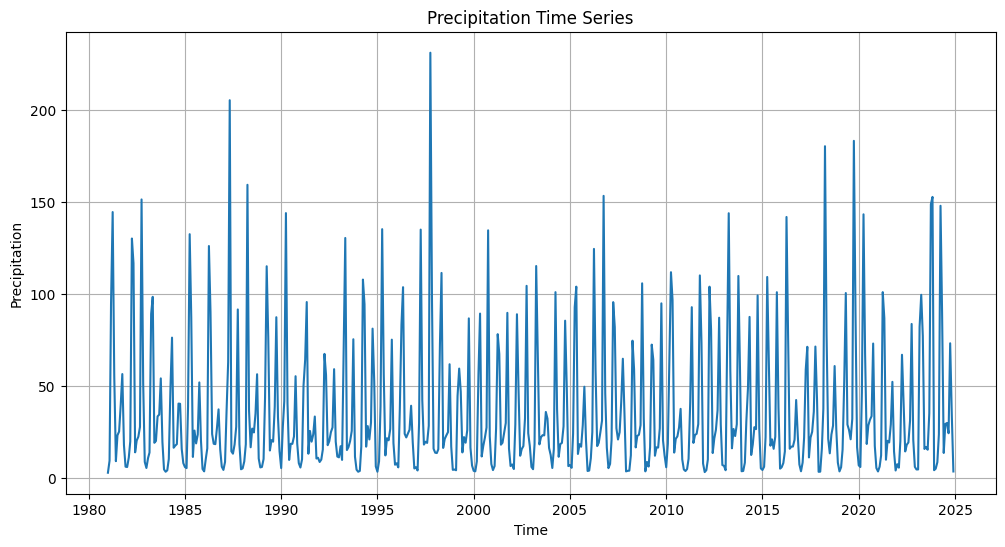

In [ ]:
# Yearly time series plot (Monthly is extremely visually cluttered)
plt.figure(figsize=(12, 6))
plt.plot(eastern_east_time_series.index, eastern_east_time_series.values)
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series')
plt.grid(True)
plt.show()

This plot shows the monthly precipitation data over time, spanning several decades
1980s to 2020. The significant variability in the data indicates that precipitation fluctuates widely from year to year, with some very large spikes (possibly due to extreme weather events) while most of the time, the values remain within a lower range. The long-term trend is hard to discern immediately due to the high frequency of data points and fluctuations.


In [ ]:
eastern_east_time_series.describe()

,precip
count,528.000000
mean,35.991753
std,37.271664
min,2.709168
25%,11.496711
50%,21.251477
75%,46.365780
max,231.125946


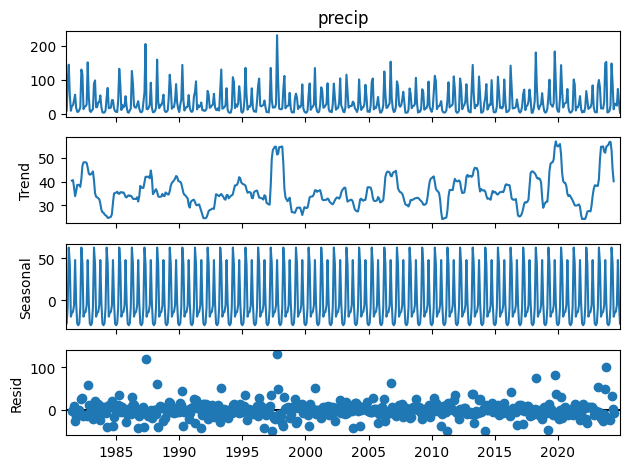

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Explain these plots

result = seasonal_decompose(eastern_east_time_series, model='additive')
result.plot()
plt.show()

Original Data: Displays the raw precipitation data.

Trend: Captures the underlying trend over time. The trend shows some fluctuations with general low and high periods, indicating possible long-term patterns in precipitation.

Seasonal Component: Reveals the yearly cycle of precipitation. This component appears periodic, with clear peaks and troughs around the same months each year, indicating seasonality (likely tied to specific weather patterns or seasons).

Residuals: Represents the noise or "leftover" variation after removing the trend and seasonal components. Ideally, residuals should resemble white noise (random fluctuations), and from the plot, we can see that residuals are scattered around zero, which indicates the model has removed much of the predictable variation.

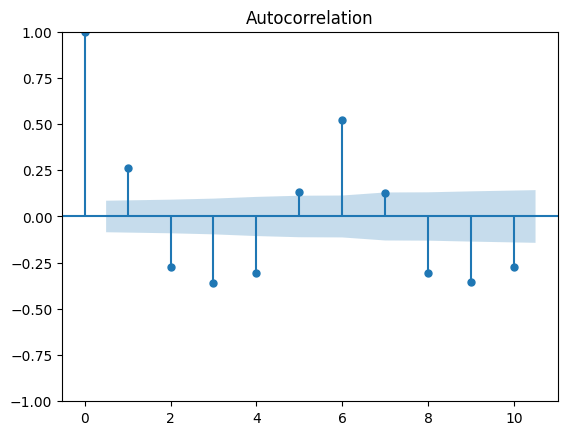

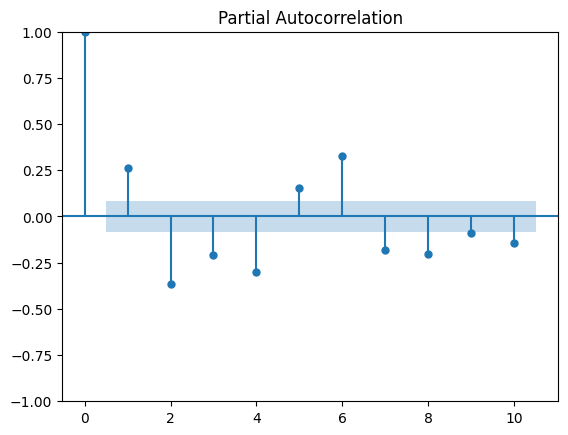

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Explain these plots

plot_acf(eastern_east_time_series, lags=10)
plot_pacf(eastern_east_time_series, lags=10)
plt.show()

Autocorrelation (ACF): Shows how correlated the time series is with its lagged versions. A large spike at lag 0 indicates a strong relationship with the current values. There are several significant autocorrelations at lags, suggesting that past values influence future values significantly.
Partial Autocorrelation (PACF): Helps in identifying the potential order of an AR (AutoRegressive) model. Significant spikes at lags 1 and 2 indicate that an AR model could capture short-term dependencies in the data.


In [ ]:
## check for stationarity
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(eastern_east_time_series)

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

# Print the test statistic and p-value
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

# Interpretation of result
if p_value <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary and may require differencing.")


ADF Statistic: -6.611576516177406
P-value: 6.3574234700131324e-09
Critical Values:
1%: -3.44328828958775
5%: -2.8672462791357867
10%: -2.569809231353463
The time series is stationary.


In [ ]:
# parameter search
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic
import pandas as pd

# Define range for AR, I, and MA terms
p_values = range(0, 4)  # AR terms (p)
d_values = range(0, 2)  # Differencing terms (d)
q_values = range(0, 4)  # MA terms (q)

# Create parameter grid
param_grid = list(itertools.product(p_values, d_values, q_values))

# Dictionary to store results
aic_results = {}

# Grid search over parameters
for order in param_grid:
    try:
        model = ARIMA(eastern_east_time_series, order=order)
        fitted_model = model.fit()
        aic_results[order] = fitted_model.aic
    except Exception as e:
        print(f"Error with ARIMA{order}: {e}")

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(list(aic_results.items()), columns=['Order', 'AIC'])
print(results_df)

# Find the best model based on AIC
best_order = results_df.loc[results_df['AIC'].idxmin()]['Order']
print(f"Best ARIMA order based on AIC: {best_order}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

        Order          AIC
0   (0, 0, 0)  5322.252550
1   (0, 0, 1)  5252.719197
2   (0, 0, 2)  5237.591772
3   (0, 0, 3)  5201.527527
4   (0, 1, 0)  5515.188203
5   (0, 1, 1)  5319.460359
6   (0, 1, 2)  5249.328390
7   (0, 1, 3)  5235.109614
8   (1, 0, 0)  5286.614014
9   (1, 0, 1)  5249.805856
10  (1, 0, 2)  5205.487194
11  (1, 0, 3)  5200.972533
12  (1, 1, 0)  5507.174066
13  (1, 1, 1)  5283.270970
14  (1, 1, 2)  5246.577194
15  (1, 1, 3)  5203.894248
16  (2, 0, 0)  5212.831596
17  (2, 0, 1)  5180.146385
18  (2, 0, 2)  4996.592963
19  (2, 0, 3)  4997.986087
20  (2, 1, 0)  5450.331901
21  (2, 1, 1)  5210.252737
22  (2, 1, 2)  5178.366981
23  (2, 1, 3)  4995.002885
24  (3, 0, 0)  5191.402336
25  (3, 0, 1)  5178.311730
26  (3, 0, 2)  4998.071223
27  (3, 0, 3)  5001.629374
28  (3, 1, 0)  5425.095892
29  (3, 1, 1)  5189.281684
30  (3, 1, 2)  5201.274091
31  (3, 1, 3)  4995.373102
Best ARIMA order based on AIC: (2, 1, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 precip   No. Observations:                  528
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2491.501
Date:                Tue, 21 Jan 2025   AIC                           4995.003
Time:                        18:09:28   BIC                           5020.606
Sample:                    01-01-1981   HQIC                          5005.027
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.001   1455.440      0.000       0.998       1.001
ar.L2         -0.9999      0.000  -3331.609      0.000      -1.001      -0.999
ma.L1         -2.0082      0.155    -12.950      0.0

<ipython-input-39-39b8d5c480cb>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=eastern_east_time_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]


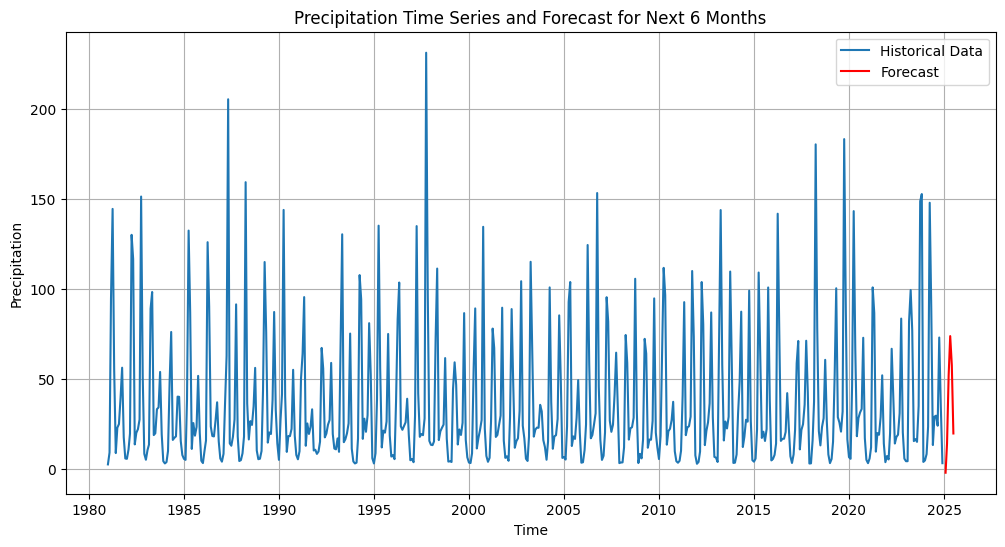

In [ ]:
# ARIMA set up
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit ARIMA model (AR=2, I=1, MA=3)
model = ARIMA(eastern_east_time_series, order=(2,1,3))
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

# Forecasting for the next 6 months
forecast_steps = 6
forecast_values = fitted_model.forecast(steps=forecast_steps)

# Print forecasted values
print(f"Forecasted values for the next {forecast_steps} months:")
print(forecast_values)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(eastern_east_time_series.index, eastern_east_time_series.values, label='Historical Data')
forecast_index = pd.date_range(start=eastern_east_time_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series and Forecast for Next 6 Months')
plt.legend()
plt.grid(True)
plt.show()

SARIMA


In [ ]:
# parameters search for SARIMA keeping ARIMA(2,1,3) fixed.
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import aic

# Define the range for seasonal parameters (P, D, Q)
P_values = range(0, 3)  # Seasonal AR
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 3)  # Seasonal MA
S_values = [12]  # Seasonal period (12 for monthly data, indicating yearly seasonality)

# Create parameter grid for seasonal components
seasonal_param_grid = list(itertools.product(P_values, D_values, Q_values, S_values))

# Dictionary to store results
aic_results_sarima = {}

# Grid search over seasonal parameters
for seasonal_order in seasonal_param_grid:
    try:
        seasonal_model = SARIMAX(eastern_east_time_series, order=(2, 1, 3), seasonal_order=seasonal_order)
        seasonal_fitted_model = seasonal_model.fit(disp=False)
        aic_results_sarima[seasonal_order] = seasonal_fitted_model.aic
    except Exception as e:
        print(f"Error with SARIMA{seasonal_order}: {e}")

# Convert results into a DataFrame for easy comparison
results_sarima_df = pd.DataFrame(list(aic_results_sarima.items()), columns=['Seasonal Order', 'AIC'])
print(results_sarima_df)

# Find the best seasonal order based on AIC
best_seasonal_order = results_sarima_df.loc[results_sarima_df['AIC'].idxmin()]['Seasonal Order']
print(f"Best SARIMA seasonal order based on AIC: {best_seasonal_order}")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Error with SARIMA(1, 1, 1, 12): LU decomposition error.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   Seasonal Order          AIC
0   (0, 0, 0, 12)  4995.002885
1   (0, 0, 1, 12)  4968.420124
2   (0, 0, 2, 12)  4920.958313
3   (0, 1, 0, 12)  4976.579409
4   (0, 1, 1, 12)  4643.583020
5   (0, 1, 2, 12)  4618.607819
6   (1, 0, 0, 12)  5018.709751
7   (1, 0, 1, 12)  4802.303428
8   (1, 0, 2, 12)  4781.938790
9   (1, 1, 0, 12)  4781.412229
10  (1, 1, 2, 12)  4615.245159
11  (2, 0, 0, 12)  4901.540258
12  (2, 0, 1, 12)  4750.608032
13  (2, 0, 2, 12)  4726.510549
14  (2, 1, 0, 12)  4743.872018
15  (2, 1, 1, 12)  4615.931389
16  (2, 1, 2, 12)  4611.004857
Best SARIMA seasonal order based on AIC: (2, 1, 2, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted values for the next 6 months using SARIMA:
2025-01-01     4.144318
2025-02-01     9.105958
2025-03-01    30.830359
2025-04-01    95.155510
2025-05-01    71.112742
2025-06-01    18.361461
Freq: MS, Name: predicted_mean, dtype: float64


<ipython-input-52-2fd23f167939>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=7, freq='M')[1:]


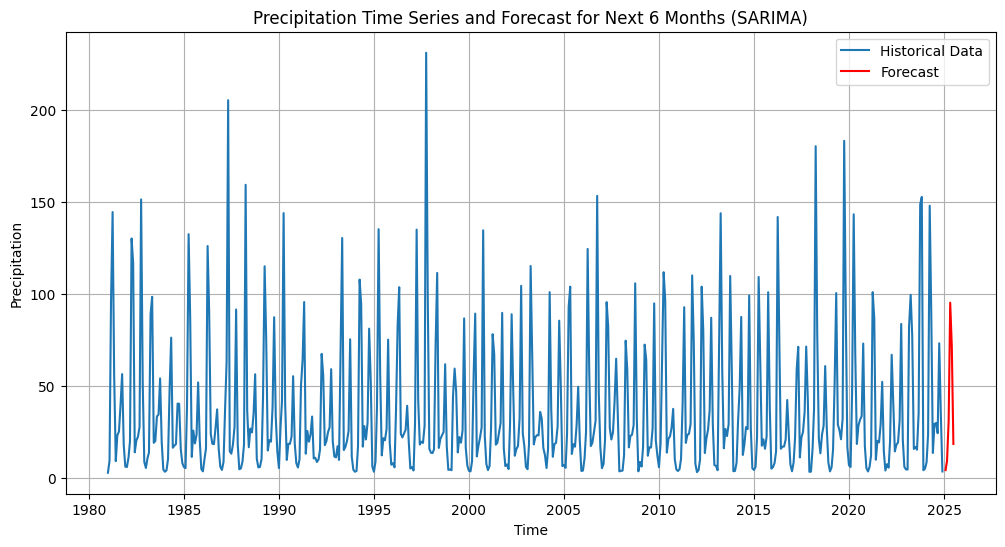

In [ ]:
# SARIMA setup - 6 months
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Ensure datetime index has a frequency set (monthly frequency)
eastern_east_time_series.index = pd.to_datetime(eastern_east_time_series.index)
eastern_east_time_series = eastern_east_time_series.asfreq('MS')  # Monthly frequency start

# Define the SARIMA model with grid seasonal parameters (P=2, D=1, Q=2, S=12)
sarima_model = SARIMAX(eastern_east_time_series, order=(2, 1, 3), seasonal_order=(2,1,2,12))

# Fit the model
fitted_sarima_model = sarima_model.fit()

# Forecast for the next 6 months
forecast_values_sarima = fitted_sarima_model.forecast(steps=6)

# Print forecasted values
print(f"Forecasted values for the next 6 months using SARIMA:")
print(forecast_values_sarima)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(eastern_east_time_series.index, eastern_east_time_series.values, label='Historical Data')
forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=7, freq='M')[1:]
plt.plot(forecast_index_sarima, forecast_values_sarima, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series and Forecast for Next 6 Months (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted values for the next 6 months using SARIMA:
2025-01-01      5.035397
2025-02-01     10.151921
2025-03-01     29.106210
2025-04-01    102.461077
2025-05-01     78.075959
2025-06-01     17.172637
Freq: MS, Name: predicted_mean, dtype: float64


<ipython-input-55-8d48647dc669>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=7, freq='M')[1:]


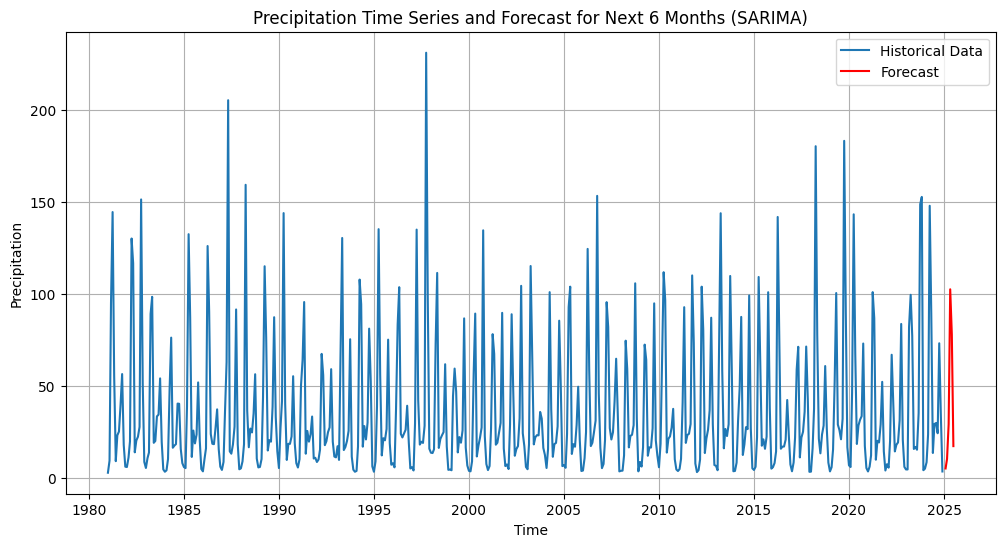

In [ ]:
# SARIMA setup - 6 months
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Ensure datetime index has a frequency set (monthly frequency)
eastern_east_time_series.index = pd.to_datetime(eastern_east_time_series.index)
eastern_east_time_series = eastern_east_time_series.asfreq('MS')  # Monthly frequency start

# Define the SARIMA model with simplified seasonal parameters (P=0, D=1, Q=1, S=12)
sarima_model = SARIMAX(eastern_east_time_series, order=(2, 1, 3), seasonal_order= (0,1,1,12)) # 0,1,1,12

# Fit the model
fitted_sarima_model = sarima_model.fit()

# Forecast for the next 6 months
forecast_values_sarima = fitted_sarima_model.forecast(steps=6)

# Print forecasted values
print(f"Forecasted values for the next 6 months using SARIMA:")
print(forecast_values_sarima)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(eastern_east_time_series.index, eastern_east_time_series.values, label='Historical Data')
forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=7, freq='M')[1:]
plt.plot(forecast_index_sarima, forecast_values_sarima, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series and Forecast for Next 6 Months (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted values for the next 18 months using SARIMA:
2025-01-01      4.144318
2025-02-01      9.105958
2025-03-01     30.830359
2025-04-01     95.155510
2025-05-01     71.112742
2025-06-01     18.361461
2025-07-01     18.856558
2025-08-01     22.399028
2025-09-01     30.809177
2025-10-01     91.812410
2025-11-01     39.082985
2025-12-01      9.139138
2026-01-01      5.371044
2026-02-01      8.293201
2026-03-01     31.176053
2026-04-01    101.595714
2026-05-01     78.088808
2026-06-01     17.193866
Freq: MS, Name: predicted_mean, dtype: float64


<ipython-input-53-3f958c0c42e6>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=19, freq='M')[1:]


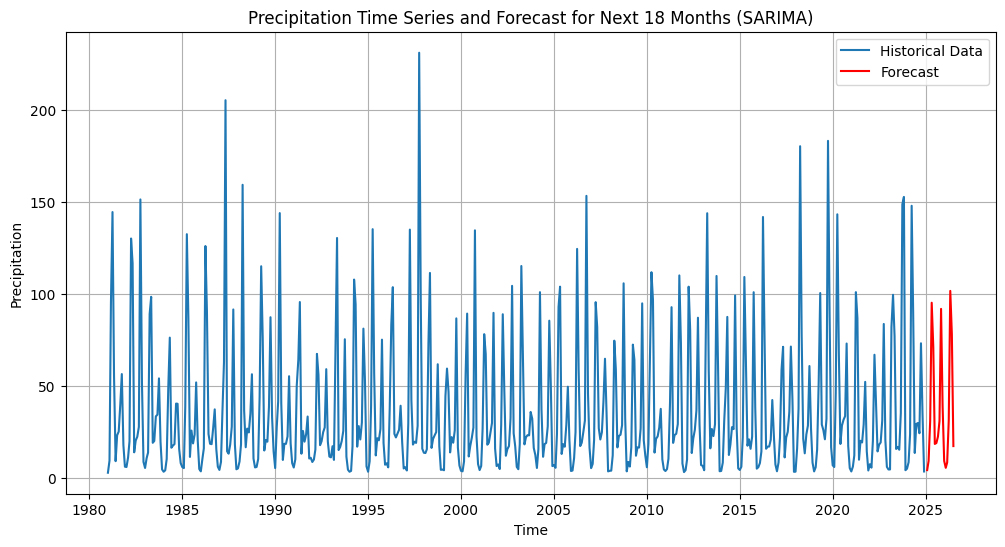

In [ ]:
# 18 months
# SARIMA setup
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index has a frequency set (monthly frequency)
eastern_east_time_series.index = pd.to_datetime(eastern_east_time_series.index)
eastern_east_time_series = eastern_east_time_series.asfreq('MS')  # Monthly frequency start

# Define the SARIMA model with seasonal parameters (P=2, D=1, Q=3, S=12)
sarima_model = SARIMAX(eastern_east_time_series, order=(2, 1, 3), seasonal_order=(2,1,2,12))

# Fit the model
fitted_sarima_model = sarima_model.fit()

# Forecast for the next 18 months
forecast_values_sarima = fitted_sarima_model.forecast(steps=18)

# Print forecasted values
print(f"Forecasted values for the next 18 months using SARIMA:")
print(forecast_values_sarima)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(eastern_east_time_series.index, eastern_east_time_series.values, label='Historical Data')

# Generate forecast index for 18 months
forecast_index_sarima = pd.date_range(start=eastern_east_time_series.index[-1], periods=19, freq='M')[1:]

# Plot the forecast
plt.plot(forecast_index_sarima, forecast_values_sarima, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Time Series and Forecast for Next 18 Months (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()


EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print(eastern_east_time_series.describe())

count    528.000000
mean      35.991753
std       37.271664
min        2.709168
25%       11.496711
50%       21.251477
75%       46.365780
max      231.125946
Name: precip, dtype: float64


# Monthly Average Precipitation

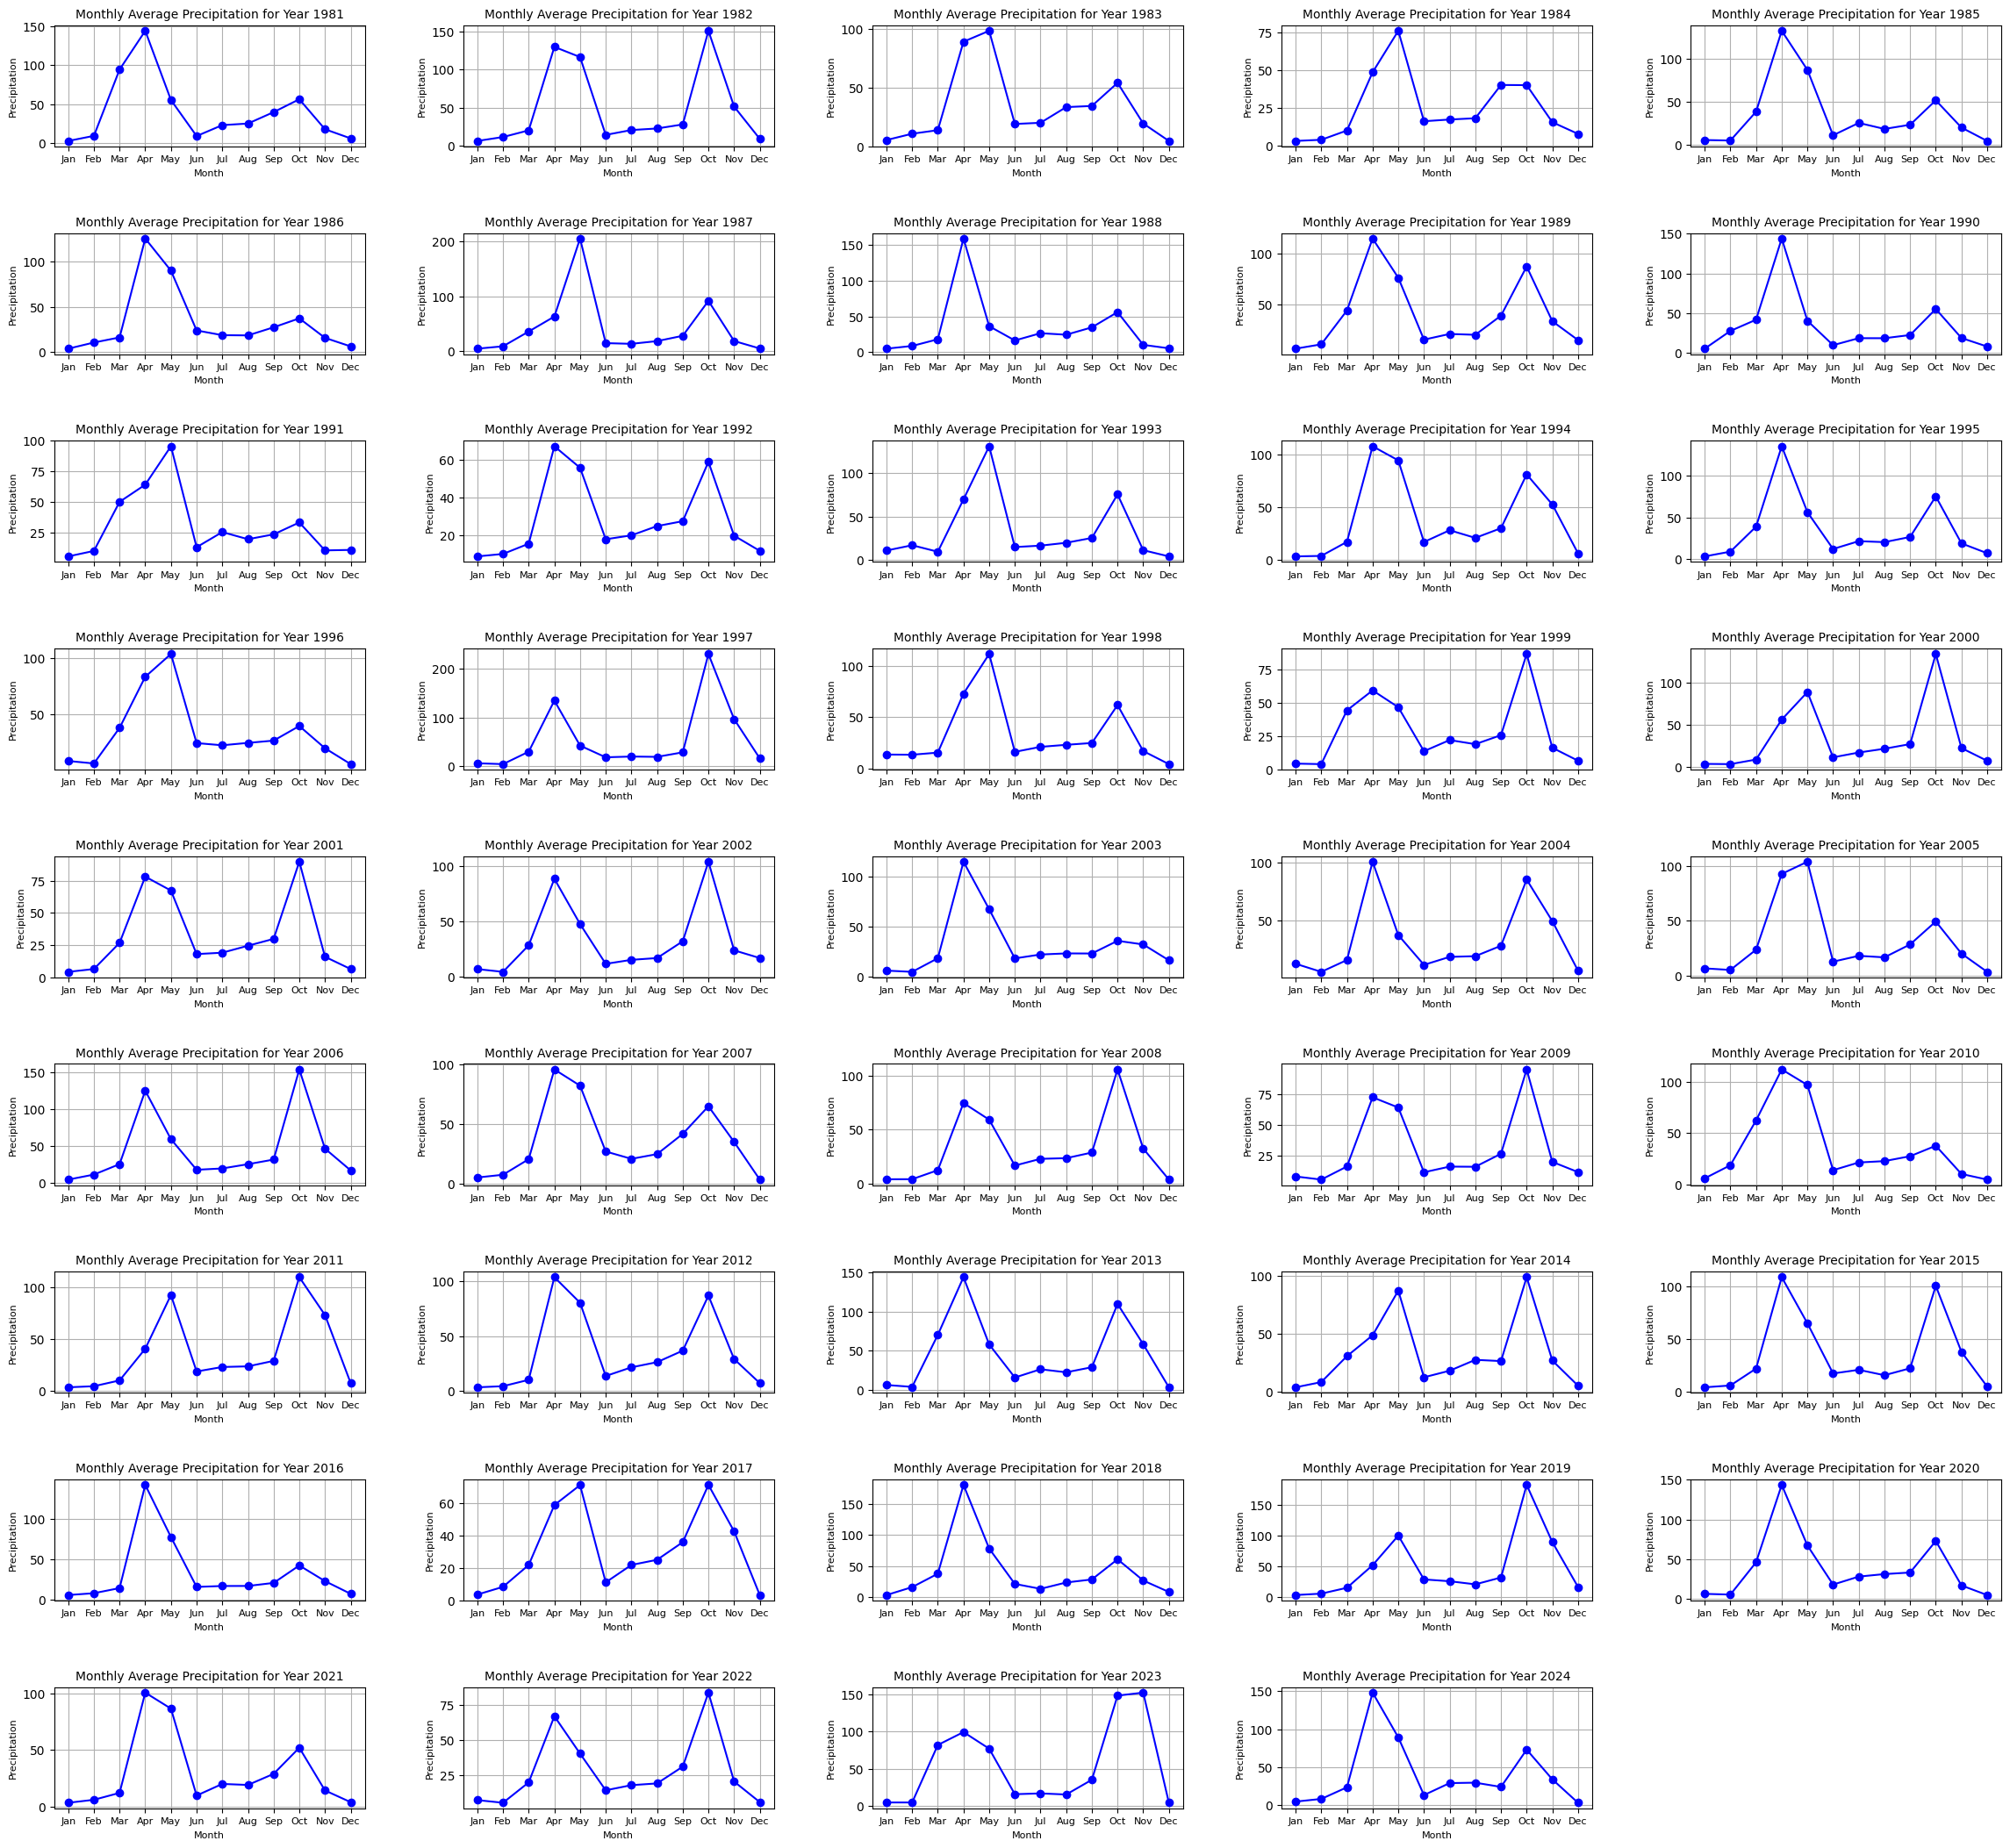

<Figure size 640x480 with 0 Axes>

In [41]:
### Mean Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_mean_precip = year_data.groupby('month')['precip'].mean()

    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_mean_precip.index, monthly_mean_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Average Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_mean_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.show()

fig_dir = '/content/drive/MyDrive/Colab_Notebooks'
plt.savefig(f'{fig_dir}/eastAf_monthly_mean_trends.png')


# Monthly Maximum Precipitation Levels

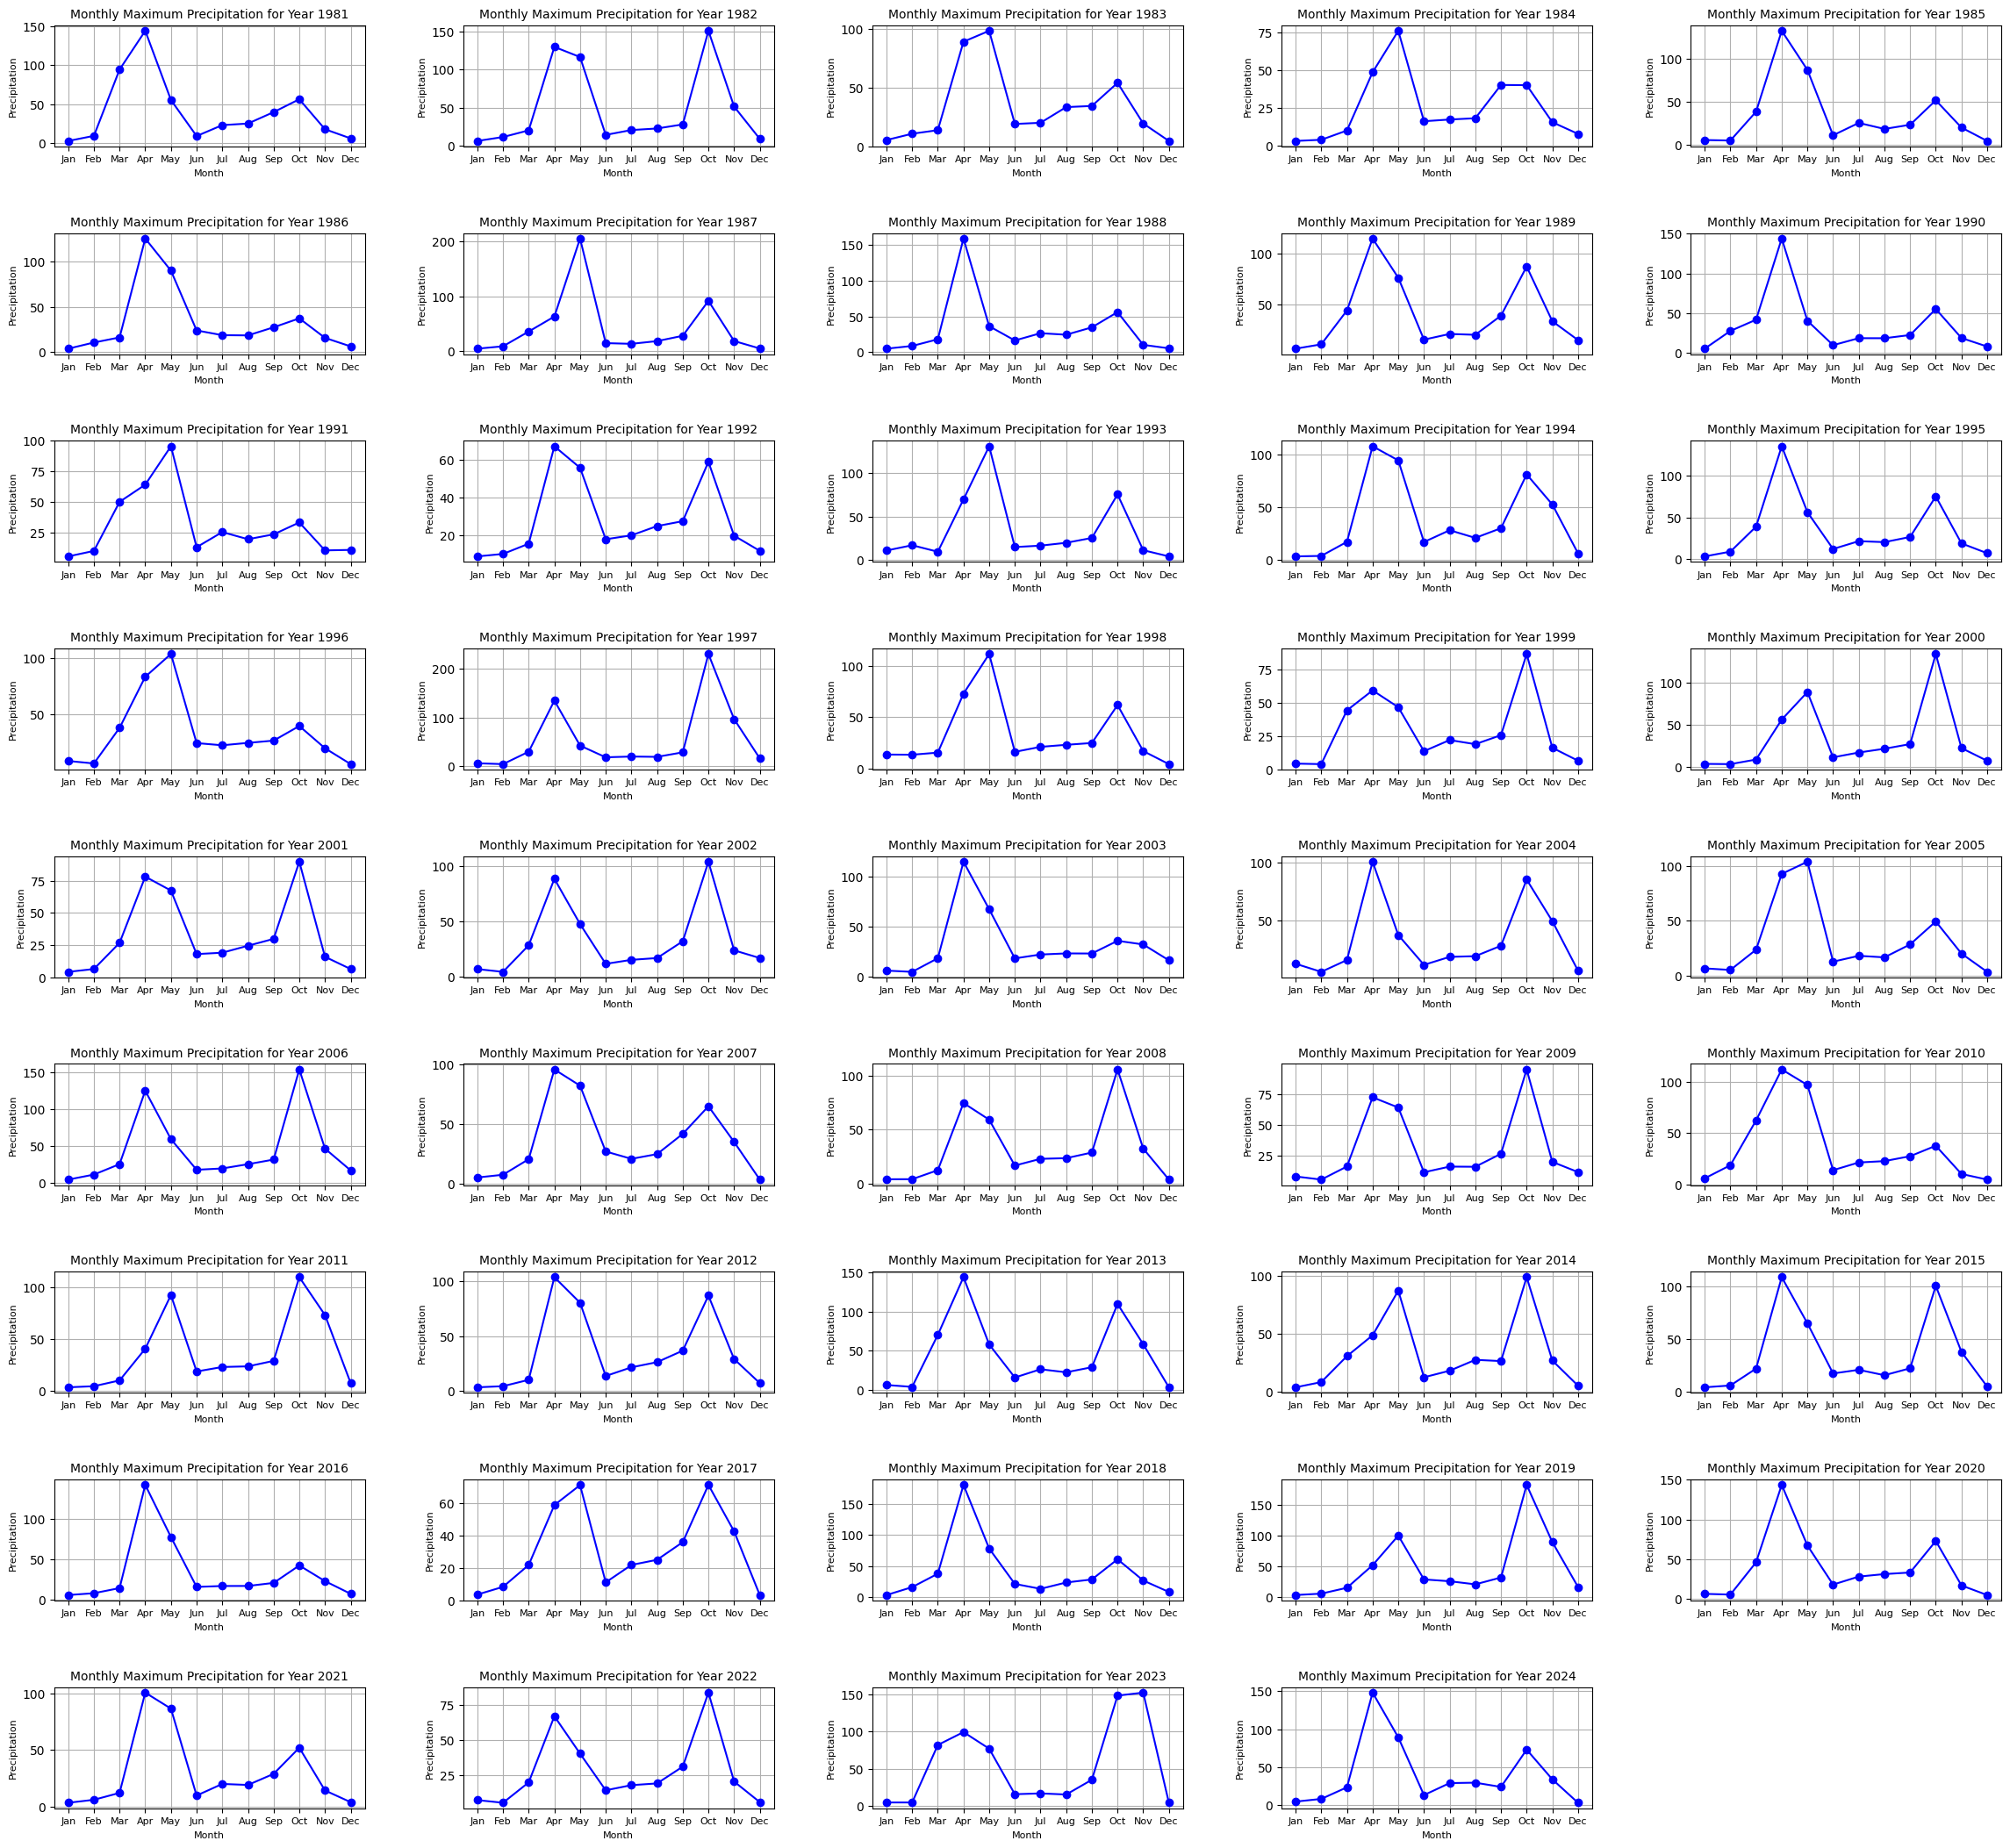

<Figure size 640x480 with 0 Axes>

In [42]:
# Monthly Maximum Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Check the new structure of the data
# print(data.head())

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_max_precip = year_data.groupby('month')['precip'].max()
    monthly_max_precip


    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_max_precip.index, monthly_max_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Maximum Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_max_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.show()

plt.savefig(f'{fig_dir}/eastAf_monthly_max_trends.png')



# Monthly Minimum Precipitation Levels

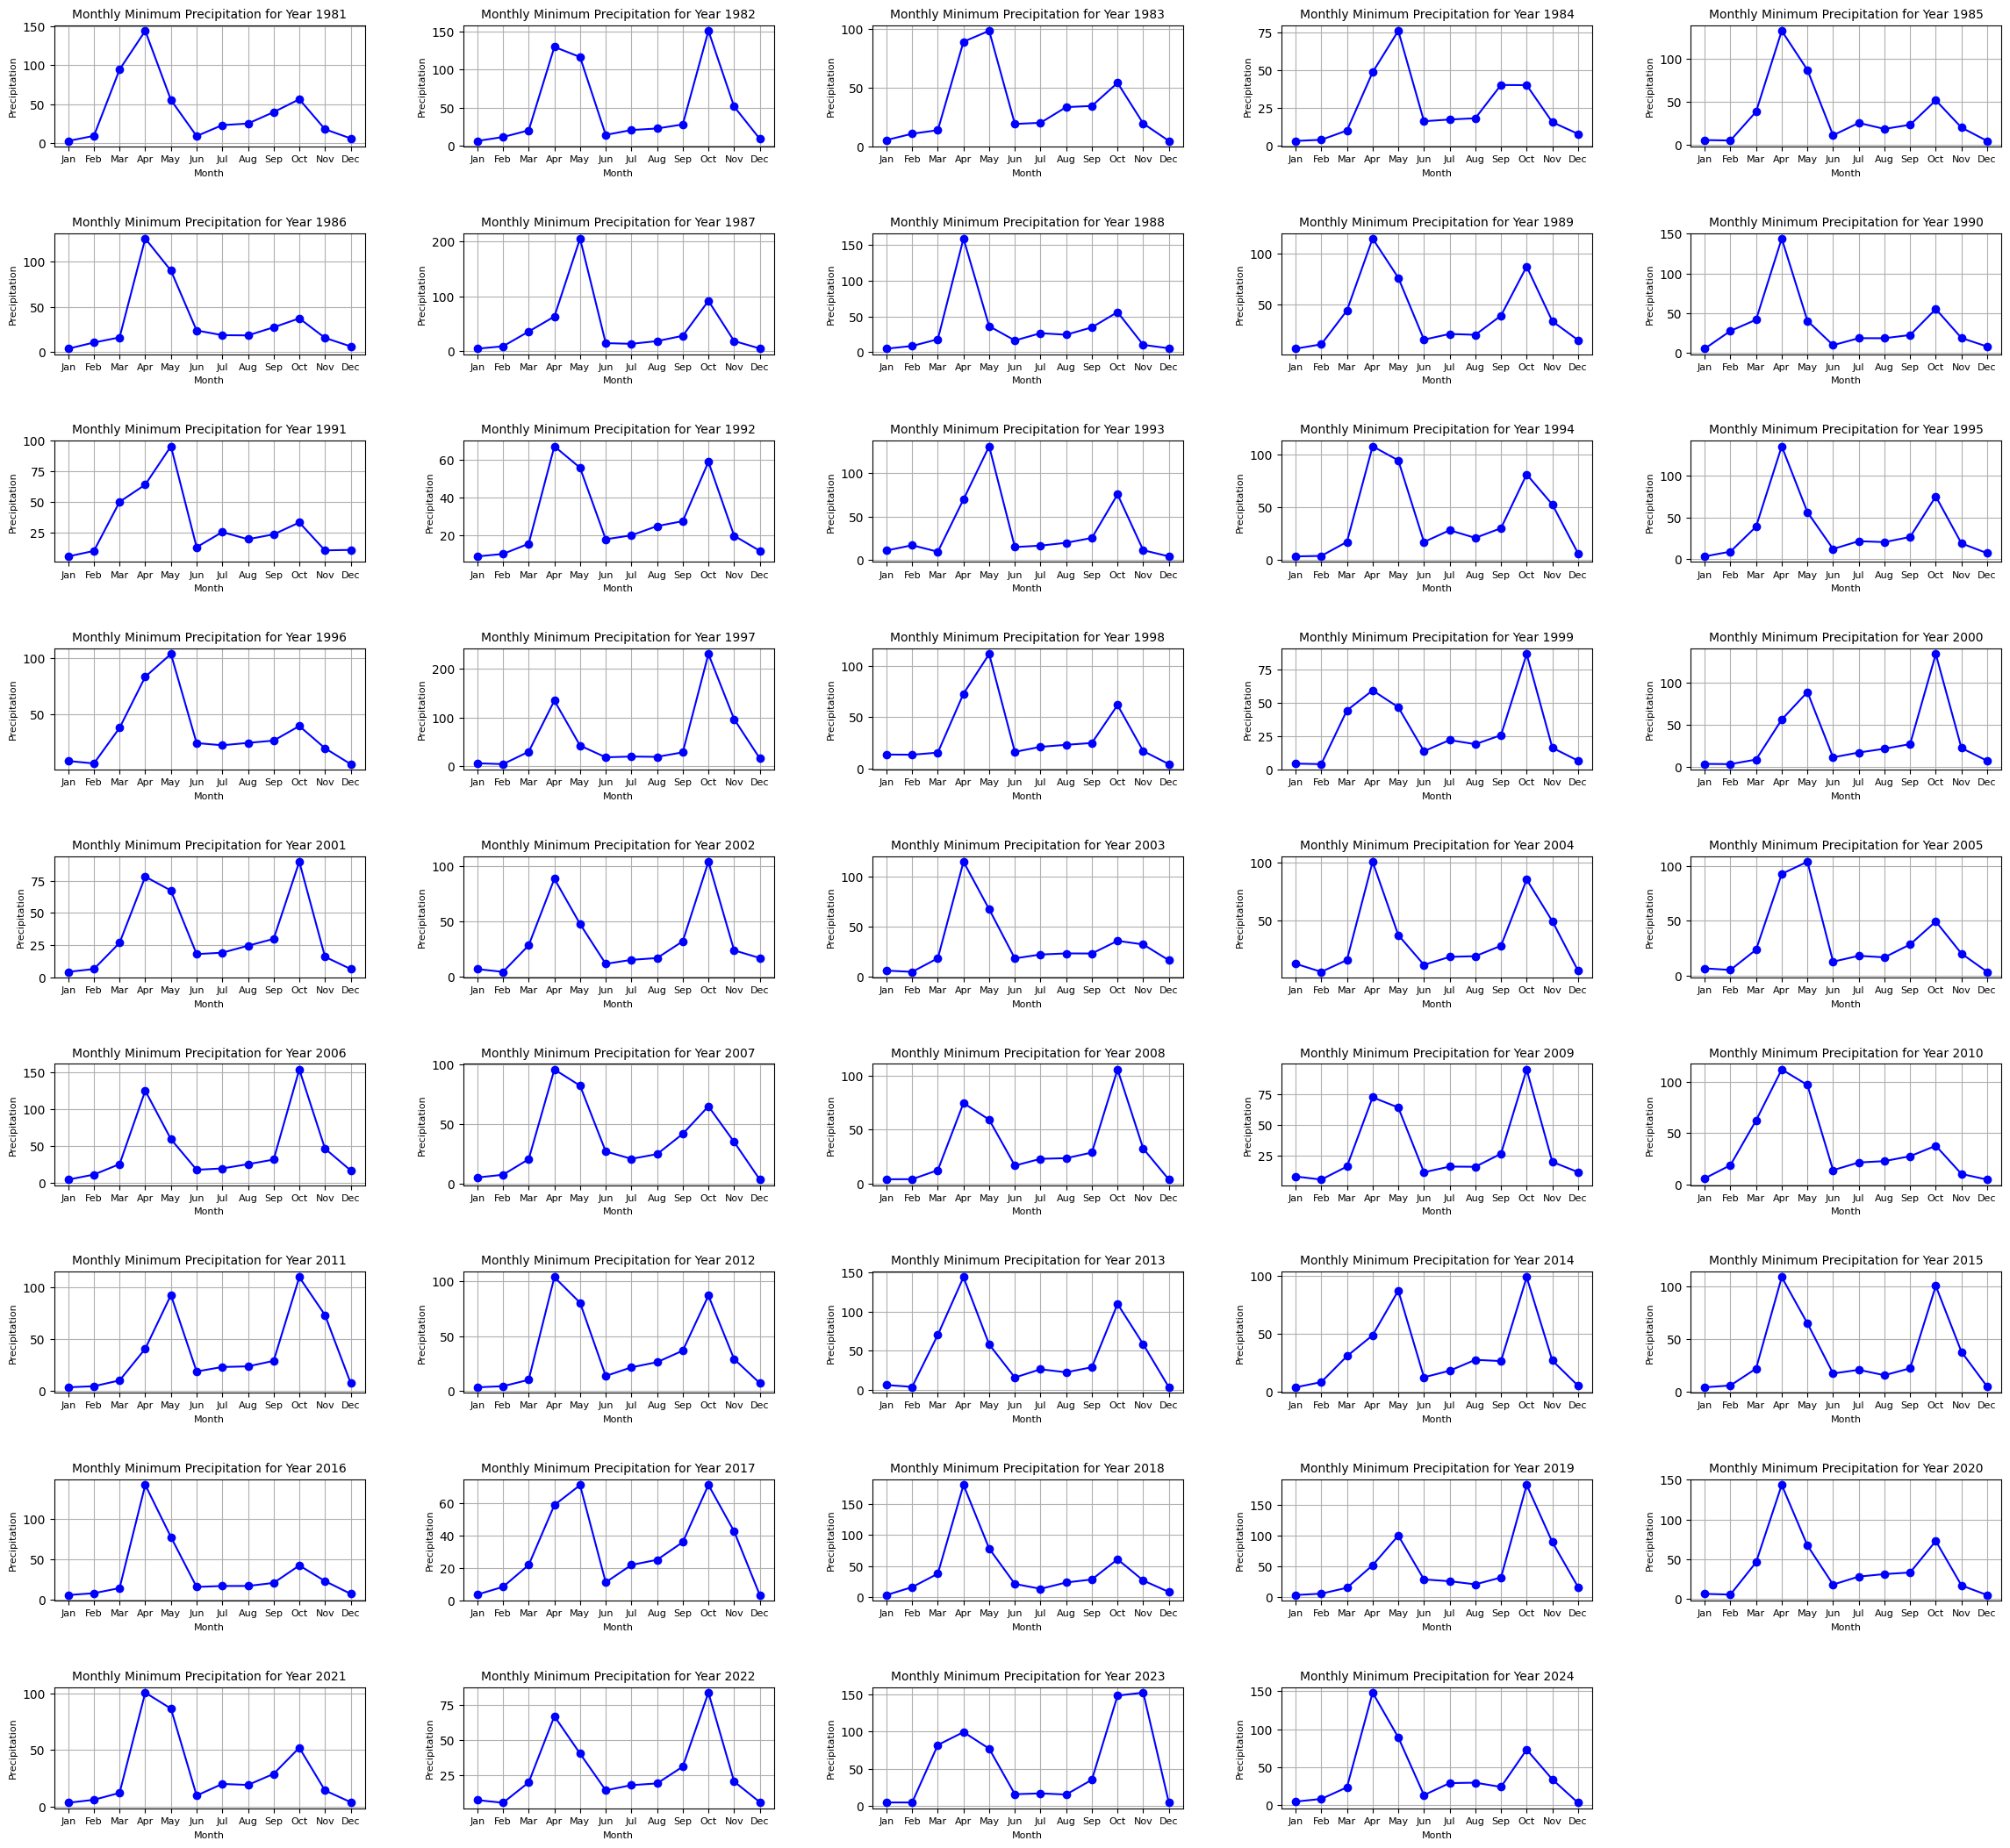

<Figure size 640x480 with 0 Axes>

In [43]:
# Monthly Minimum Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Check the new structure of the data
# print(data.head())

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_min_precip = year_data.groupby('month')['precip'].min()

    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_min_precip.index, monthly_min_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Minimum Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_min_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.show()

plt.savefig(f'{fig_dir}/eastAf_monthly_min_trends.png')

